<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
        Survival Prediction Using Neural Networks
    </div>

<img src="https://img.freepik.com/premium-photo/titanic-ship-with-large-ship-front_812426-58384.jpg" alt="Beach Scene" style="width:100%;height:100%; border:5px solid #FF7043;">


<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Importing Necessary Libraries    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_df  = pd.read_csv("/kaggle/input/titanic/train.csv")
val_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Exploratory Data Analysis   </div>

In [3]:
print(f"Dimensions of Train Data : {train_df.shape}")
print(f"Dimensions of Test Data : {val_df.shape}")

Dimensions of Train Data : (891, 12)
Dimensions of Test Data : (418, 11)


In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Data visualization   </div>

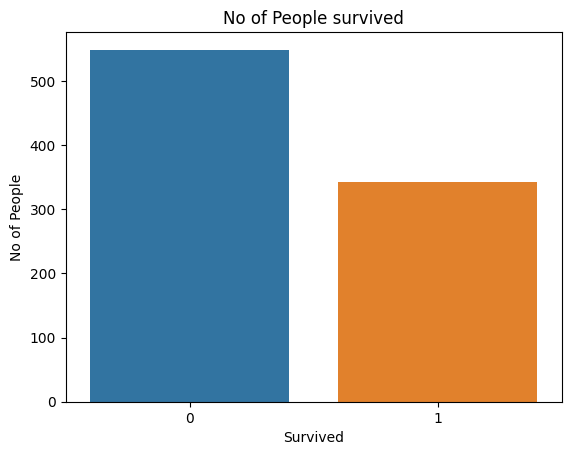

In [7]:

sns.countplot(data = train_df , x ='Survived')
plt.xlabel("Survived")
plt.ylabel("No of People")
plt.title("No of People survived")
plt.show()

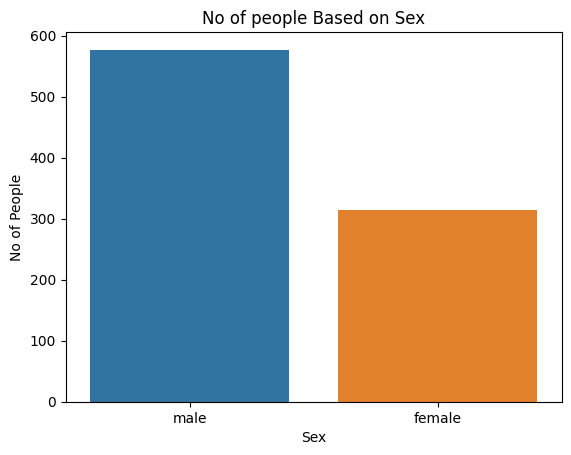

In [8]:
sns.countplot(data = train_df , x ='Sex')
plt.xlabel("Sex")
plt.ylabel("No of People")
plt.title("No of people Based on Sex")
plt.show()

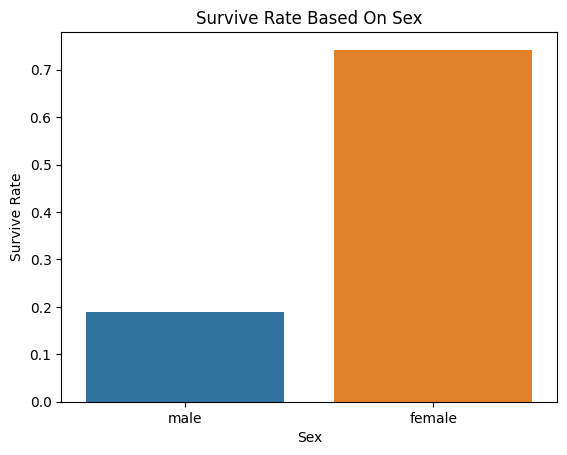

In [9]:
sns.barplot(train_df, x="Sex", y="Survived",ci = None)
plt.xlabel("Sex")
plt.ylabel("Survive Rate")
plt.title("Survive Rate Based On Sex")
plt.show()


<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Data Preprocessing    </div>

In [10]:
def data_preprocess(df):
    df = df.copy()
    
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    return df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [11]:
x = data_preprocess(train_df)
y = train_df['Survived']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train_df = scaler.fit_transform(x_train)
x_test_df = scaler.transform(x_test)


<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Model Building  </div>

In [14]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train_df.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    x_train_df, y_train,
    epochs=22,
    batch_size=32,
    validation_data=(x_test_df, y_test),
    verbose=1
)

Epoch 1/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5067 - loss: 0.7053 - val_accuracy: 0.7989 - val_loss: 0.5795
Epoch 2/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.5268 - val_accuracy: 0.7989 - val_loss: 0.4595
Epoch 3/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8046 - loss: 0.4499 - val_accuracy: 0.7989 - val_loss: 0.4302
Epoch 4/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.4377 - val_accuracy: 0.7933 - val_loss: 0.4258
Epoch 5/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4003 - val_accuracy: 0.7989 - val_loss: 0.4235
Epoch 6/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.4057 - val_accuracy: 0.7989 - val_loss: 0.4305
Epoch 7/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4456 - val_accuracy: 0.8101 - val_loss: 0.4292
Epoch 8/22
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.3543 - val_accuracy: 0.8045 - val_loss

In [17]:

valid_df = data_preprocess(val_df)
validation_df = scaler.transform(valid_df)

In [18]:
Test_predictions = model.predict(validation_df)
Test_predictions = (Test_predictions > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<div style="background-color: #2C3E50; color: white; text-align: center; padding: 20px; font-family: Arial, sans-serif; font-size: 24px;">
Submission File </div>

In [19]:
res = pd.DataFrame({'PassengerId': val_df['PassengerId'], 'Survived': Test_predictions.flatten()})
res.to_csv('submission.csv', index=False)

In [20]:
res.shape

(418, 2)